In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#avoid warnings
import warnings
warnings.filterwarnings("ignore")

#import libiary
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn import datasets

#save model
import joblib

dataset link: https://www.kaggle.com/datasets/mansoordaku/ckdisease

In [2]:
#import dataset

dataset = pd.read_csv(r"D:\MACHINE LEARNING\FINAL PROJECT\Dataset\health\kidney.csv")

In [33]:
#read dataset

dataset.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1.0,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,38.0,6000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60.0,90.0,1.015,3.0,0.0,1.0,1.0,0.0,0.0,74.0,...,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,68.0,70.0,1.010,0.0,0.0,1.0,0.0,0.0,0.0,100.0,...,36.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,24.0,0.0,1.015,2.0,4.0,0.0,1.0,0.0,0.0,410.0,...,44.0,6900.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,138.0,...,33.0,9600.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0


# Understanding DataSet

In [4]:
#shape of dataset

dataset.shape

(400, 26)

In [5]:
#information about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
#describe about dataset

dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [7]:
dataset.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
id                  0
classification      0
dtype: int64

In [8]:
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

dataset.rename(columns=cols_names, inplace=True)

In [9]:
dataset.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
numerical_features = []
categorical_features = []

for i in dataset.columns:
    if dataset[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
        
for i in categorical_features:
    print(f'{i} has {dataset[i].unique()} categories.\n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] categories.

coronary_artery_disease has ['no' 'yes' '\tno' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'ckd\t' 'notckd'] categories.



In [11]:
#cleaning
dataset['diabetes_mellitus'] = dataset['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
dataset['coronary_artery_disease'] = dataset['coronary_artery_disease'].replace(to_replace = {'\tno':'no',' no':'no'})
dataset['classification'] = dataset['classification'].replace(to_replace = {'ckd ':'ckd','ckd\t':'ckd'})

In [12]:
for i in categorical_features:
    print(f'{i} has {dataset[i].unique()} categories.\n')

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' nan] categories.

coronary_artery_disease has ['no' 'yes' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'notckd'] categories.



In [13]:
dataset.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [14]:
#replace values

dataset[["appetite"]] = dataset[["appetite"]].replace(to_replace={"good":1,"poor":0,np.nan:0})

In [15]:
#replace values

dataset[["hypertension","diabetes_mellitus","coronary_artery_disease","pedal_edema","anemia"]] = dataset[["hypertension","diabetes_mellitus","coronary_artery_disease","pedal_edema","anemia"]].replace(to_replace={"yes":1,"no":0,np.nan:1})

dataset[["red_blood_cells","pus_cell"]] = dataset[["red_blood_cells","pus_cell"]].replace(to_replace={"normal":0,"abnormal":1,np.nan:1})

dataset[["pus_cell_clumps","bacteria"]] = dataset[["pus_cell_clumps","bacteria"]].replace(to_replace={"notpresent":0,"present":1,np.nan:1})

In [16]:
dataset[["packed_cell_volume"]] = dataset[["packed_cell_volume"]].replace(to_replace={"\t?":0,np.nan:0,"\t43":43}).astype("float64")

mean = dataset[["packed_cell_volume"]].mean()
dataset[["packed_cell_volume"]] = dataset[["packed_cell_volume"]].replace(to_replace={0:mean})

dataset[["white_blood_cell_count"]] = dataset[["white_blood_cell_count"]].replace(to_replace={"\t?":0,np.nan:0,"\t6200":6200,"\t8400":8400}).astype("float64")

mean = dataset[["white_blood_cell_count"]].mean()
dataset[["white_blood_cell_count"]] = dataset[["white_blood_cell_count"]].replace(to_replace={0:mean})


dataset[["red_blood_cell_count"]] = dataset[["red_blood_cell_count"]].replace(to_replace={"\t?":0,np.nan:0}).astype("float64")

mean = dataset[["red_blood_cell_count"]].mean()
dataset[["red_blood_cell_count"]] = dataset[["red_blood_cell_count"]].replace(to_replace={0:mean})

In [17]:
list_empty=["sodium","haemoglobin","potassium","serum_creatinine","blood_urea","blood_glucose_random",
         "sugar","albumin","blood_pressure","specific_gravity","age"]

dataset[list_empty] = dataset[list_empty].replace(to_replace={np.nan:0}).astype("float64")


for i in list_empty:
    mean = dataset[[i]].mean()
    dataset[[i]] = dataset[[i]].replace(to_replace={0:mean})
    
dataset.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

In [18]:
#replace values

dataset[["classification"]] = dataset[["classification"]].replace(to_replace={"ckd":1,"notckd":0}).astype("float64")

#rename 
dataset.rename(columns={'classification':'class'},inplace=True)

#drop
dataset.drop(columns={"id"},inplace=True)

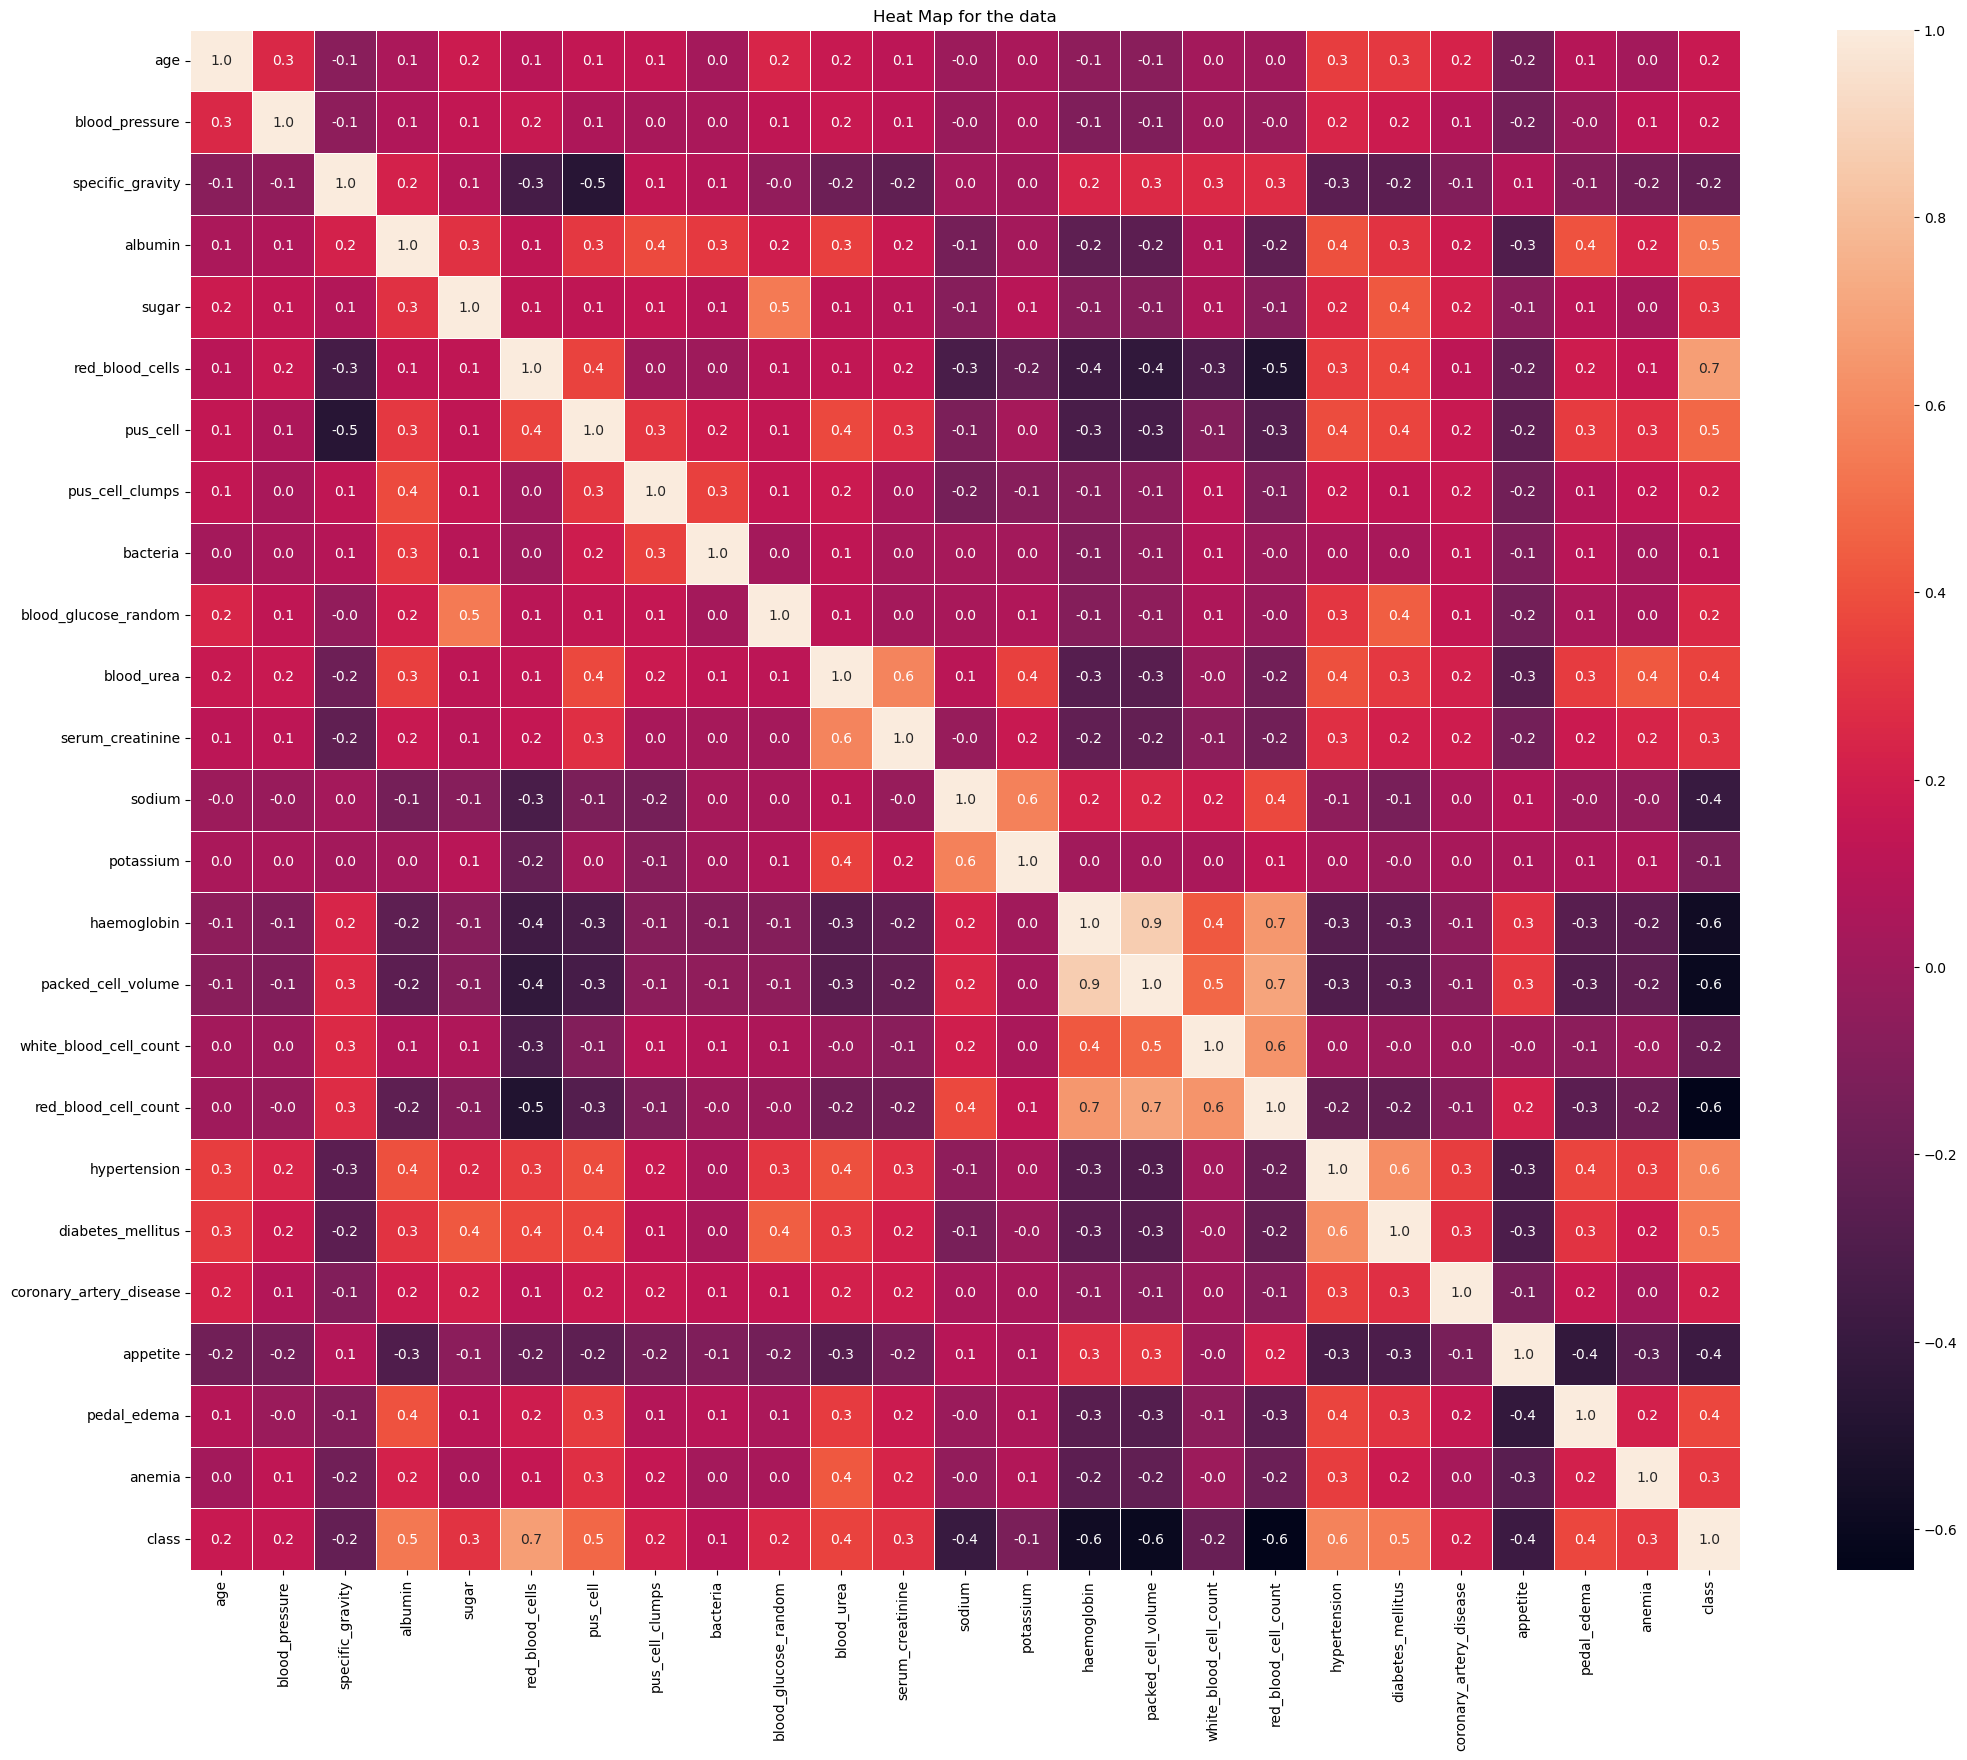

In [19]:
#understanding data

corr= dataset.corr()

plt.subplots(figsize=(25,20))
sns.heatmap(corr,cbar=True,linewidth=.5,annot=True,fmt=".1f")
plt.title("Heat Map for the data")
plt.show()

Percent of chronic kidney disease sample:  0.0 %
Percent of not a chronic kidney disease sample:  0.0 %


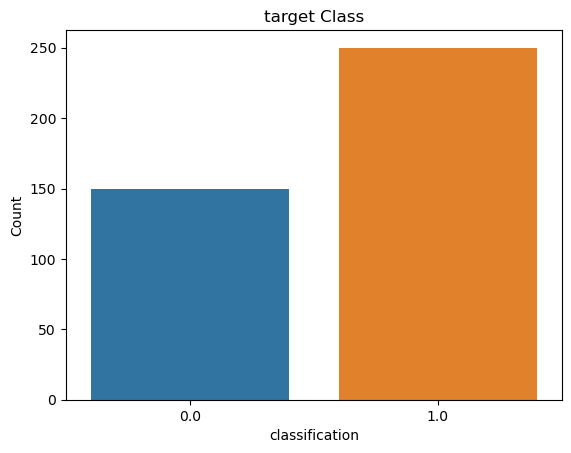

In [20]:
print('Percent of chronic kidney disease sample: ',round(len(dataset[dataset['class']=='ckd'])/len(dataset['class'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(dataset[dataset['class']=='notckd'])/len(dataset['class'])*100,2),"%")

sns.countplot(x='class',data=dataset)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()


In [21]:
columns=["blood_pressure","albumin","sugar","blood_urea","haemoglobin","white_blood_cell_count","red_blood_cell_count",
         "hypertension","appetite","anemia"]

x=dataset[columns]
y=dataset["class"]

In [22]:
#StandardScaler

Scaler=StandardScaler()
X=Scaler.fit_transform(x)

In [23]:
#split training and testing data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=2)

# machine learning model selection

LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

model1.fit(x_train,y_train)

x_train_pred = model1.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model1.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  94.0
Accuracy on Testing data:  94.0

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92        35
         1.0       0.98      0.92      0.95        65

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.94      0.94      0.94       100



super vector machine

In [25]:
from sklearn.svm import SVC

model2=SVC()

model2.fit(x_train,y_train)

x_train_pred = model2.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model2.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  95.33333333333334
Accuracy on Testing data:  98.0

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        35
         1.0       0.98      0.98      0.98        65

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()

model3.fit(x_train,y_train)

x_train_pred = model3.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model3.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  100.0
Accuracy on Testing data:  97.0

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        35
         1.0       1.00      0.95      0.98        65

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



Gaussian navie bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()

model4.fit(x_train,y_train)

x_train_pred = model4.predict(x_train)
training_data_Accuracy = accuracy_score(x_train_pred,y_train)
print("Accuracy on Training data: ",training_data_Accuracy*100 )

x_test_pred = model4.predict(x_test)
testing_data_Accuracy = accuracy_score(x_test_pred,y_test)
print("Accuracy on Testing data: ",testing_data_Accuracy*100 )
print()
print(classification_report(y_test,x_test_pred))

Accuracy on Training data:  92.0
Accuracy on Testing data:  93.0

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        35
         1.0       1.00      0.89      0.94        65

    accuracy                           0.93       100
   macro avg       0.92      0.95      0.93       100
weighted avg       0.94      0.93      0.93       100



# <h4>comparely, RandomForstClassifier give high Accuracy<h4>

In [43]:
#predication

input_Data=[80,1,0,36,15.4,7800.0,5.2,1,1,0]  #1
#input_Data=[80,0,0,18,15.8,6800.0,6.1,0,1,0]   #0
input_data_to_array = np.asarray(input_Data)

input_Data_reshaped = input_data_to_array.reshape(1,-1)

std  = Scaler.transform(input_Data_reshaped)

predication = model3.predict(std)

print(predication)

if predication[0] == 0:
    print("No need to fear. You have no dangerous symptoms of the disease")
    
else:
    print("Sorry you chances of getting the disease. Please consult the doctor immediately")

[1.]
Sorry you chances of getting the disease. Please consult the doctor immediately


In [44]:
#save the model

#location => D:\MACHINE LEARNING\FINAL PROJECT\Models\health\

import joblib

joblib.dump(model3,r"D:\MACHINE LEARNING\FINAL PROJECT\Models\health\kidney_model.pkl")

['D:\\MACHINE LEARNING\\FINAL PROJECT\\Models\\kidney_model.pkl']

In [46]:
#load model

load_model = joblib.load(r"D:\MACHINE LEARNING\FINAL PROJECT\Models\health\kidney_model.pkl")

#predication

input_Data=[80,1,0,36,15.4,7800.0,5.2,1,1,0]  #1
#input_Data=[80,0,0,18,15.8,6800.0,6.1,0,1,0]   #0
input_data_to_array = np.asarray(input_Data)

input_Data_reshaped = input_data_to_array.reshape(1,-1)

std  = Scaler.transform(input_Data_reshaped)

predication = load_model.predict(std)

print(predication)

if predication[0] == 0:
    print("No need to fear. You have no dangerous symptoms of the disease")
    
else:
    print("Sorry you chances of getting the disease. Please consult the doctor immediately")

[1.]
Sorry you chances of getting the disease. Please consult the doctor immediately


# Working Sucessfully